In [11]:
import pandas as pd
from collections import defaultdict

loaded = defaultdict(list)
squished = []

file_labels = {
    "glad-mixed-sweep-1": "mixed grid (99% coop)",
    "glad-standard-sweep-1": "standard grid (99% coop)"
}

#file_labels = dict()

#for key in file_base_labels:
#    for i in range(1, 10):
#        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"
        
#print(file_labels)

folder = "./99-hostile-orgs-on-the-grid/"

num_files = 20


for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)
    
super_squished = pd.concat(squished)
#super_squished = pd.concat([squished_coop, squished_balanced])
super_squished.head()

,update,avg_age,max_age,avg_coop,avg_points,percent_defector,donator,replicant,config
0,0,0.00000,0,0.990000,0.00000,0.010000,0.990000,0,standard grid (99% coop)
1,10,10.00000,10,0.990000,10.00000,0.010000,0.990000,0,standard grid (99% coop)
2,20,20.00000,20,0.990000,20.00000,0.010000,0.990000,0,standard grid (99% coop)
3,30,4.09611,30,0.982778,8.79583,0.017222,0.982778,0,standard grid (99% coop)
4,40,2.81306,40,0.972222,19.20940,0.027778,0.972222,0,standard grid (99% coop)


Populating the interactive namespace from numpy and matplotlib


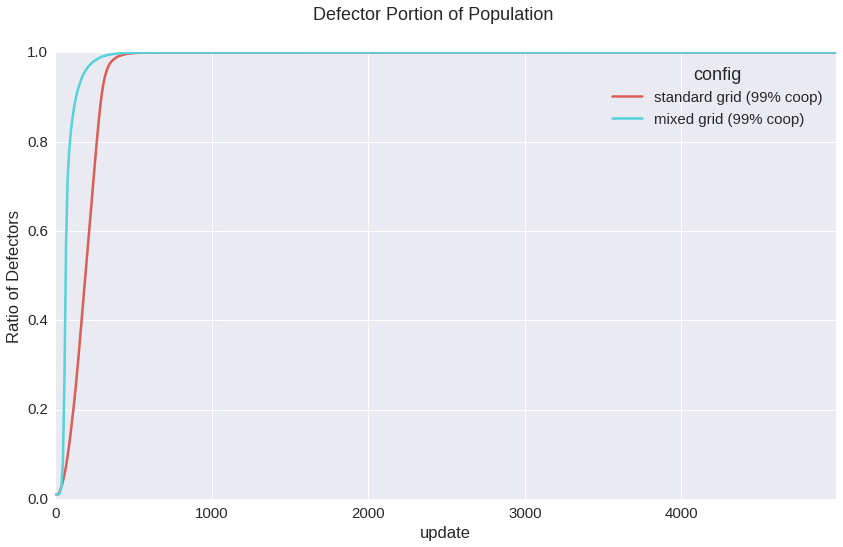

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)
sns.plt.suptitle("Defector Portion of Population")
ax = sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished, color="hls")
ax.set(ylabel="Ratio of Defectors")